In [2]:
import pandas as pd

#### Import CSV

In [68]:
df = pd.read_csv('training.csv', index_col=0)

#### Get X & Y

In [62]:
X = df.drop(columns=['rider', 'team', 'key', 'target', 'year'])
X.fillna(0, inplace=True)
y = df.target

In [69]:
X_year = df.drop(columns=['rider', 'team', 'key', 'target']).fillna(0)
X_train = X_year[X_year['year']!=2021].drop(columns='year')
X_test = X_year[X_year['year']==2021].drop(columns='year')
y_year = df[['year', 'target']]
y_train = y_year[y_year['year']!=2021].drop(columns='year')
y_test = y_year[y_year['year']==2021].drop(columns='year')

#### Check na

In [82]:
corr = X.corr()
corr

,age,team_points,best-classic-riders,top-gc-riders,top-sprinters,top-time-trial-riders,profile_type,profile_score,profile_vert,scorito
age,1.000000,0.040574,0.072090,-0.034940,-0.079501,-0.002566,-0.040316,0.085066,0.011335,0.001007
team_points,0.040574,1.000000,0.151833,0.221839,0.057008,0.068614,0.340108,-0.462032,-0.147412,0.124635
best-classic-riders,0.072090,0.151833,1.000000,0.198326,0.609911,-0.028056,0.036229,-0.059669,0.016565,0.182265
top-gc-riders,-0.034940,0.221839,0.198326,1.000000,-0.046630,0.290569,0.029261,-0.027056,0.035174,0.315724
top-sprinters,-0.079501,0.057008,0.609911,-0.046630,1.000000,-0.074447,0.007433,-0.058360,-0.008576,0.156655
top-time-trial-riders,-0.002566,0.068614,-0.028056,0.290569,-0.074447,1.000000,-0.013543,0.003559,0.081886,0.210517
profile_type,-0.040316,0.340108,0.036229,0.029261,0.007433,-0.013543,1.000000,-0.744882,0.121583,-0.007050
profile_score,0.085066,-0.462032,-0.059669,-0.027056,-0.058360,0.003559,-0.744882,1.000000,-0.135332,-0.022542
profile_vert,0.011335,-0.147412,0.016565,0.035174,-0.008576,0.081886,0.121583,-0.135332,1.000000,-0.013778
scorito,0.001007,0.124635,0.182265,0.315724,0.156655,0.210517,-0.007050,-0.022542,-0.013778,1.000000


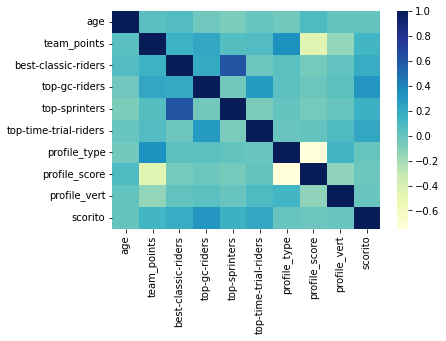

In [83]:
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");

In [87]:
from sklearn.inspection import permutation_importance

lin_model = Lasso().fit(X_scaled,y)

perm = permutation_importance(lin_model, X_scaled, y, n_repeats=10)

In [88]:
perm_df = pd.DataFrame(np.vstack((X.columns, perm.importances_mean)).T, columns=['feature', 'importance']).sort_values('importance', ascending=False)
perm_df

,feature,importance
3,top-gc-riders,0.194467
4,top-sprinters,0.113195
5,top-time-trial-riders,0.039622
1,team_points,0.020709
7,profile_score,0.020242
9,scorito,0.01239
0,age,0.007097
2,best-classic-riders,0.003885
6,profile_type,0.000035
8,profile_vert,0.0


In [90]:
from sklearn.model_selection import cross_val_score

col_keep = list(perm_df[perm_df['importance']>0.010]['feature'])
X_simplified = X[col_keep]
X_simplified = scaler.fit_transform(X_simplified)

simplified_model_score = cross_val_score(lin_model, X_simplified, y).mean()
simplified_model_score

0.2015798944542399

In [70]:
X

,age,team_points,best-classic-riders,top-gc-riders,top-sprinters,top-time-trial-riders,profile_type,profile_score,profile_vert,scorito
1,29,5145,36.0,255.0,0.0,98.0,2.857143,137.095238,2244.285714,326.0
2,31,5145,13.0,108.0,0.0,74.0,2.857143,137.095238,2244.285714,18.0
4,30,5145,206.0,53.0,389.8,0.0,2.857143,137.095238,2244.285714,36.0
5,30,5145,100.0,42.0,0.0,0.0,2.857143,137.095238,2244.285714,18.0
6,33,5145,175.0,0.0,0.0,0.0,2.857143,137.095238,2244.285714,186.0
...,...,...,...,...,...,...,...,...,...,...
1102,27,1405,0.0,30.0,0.0,25.0,2.809524,153.809524,2261.761905,0.0
1103,34,1405,110.0,25.0,0.0,47.0,2.809524,153.809524,2261.761905,0.0
1104,31,1405,19.0,20.0,146.0,0.0,2.809524,153.809524,2261.761905,73.0
1105,30,1405,0.0,9.0,8.0,85.0,2.809524,153.809524,2261.761905,0.0


<AxesSubplot:>

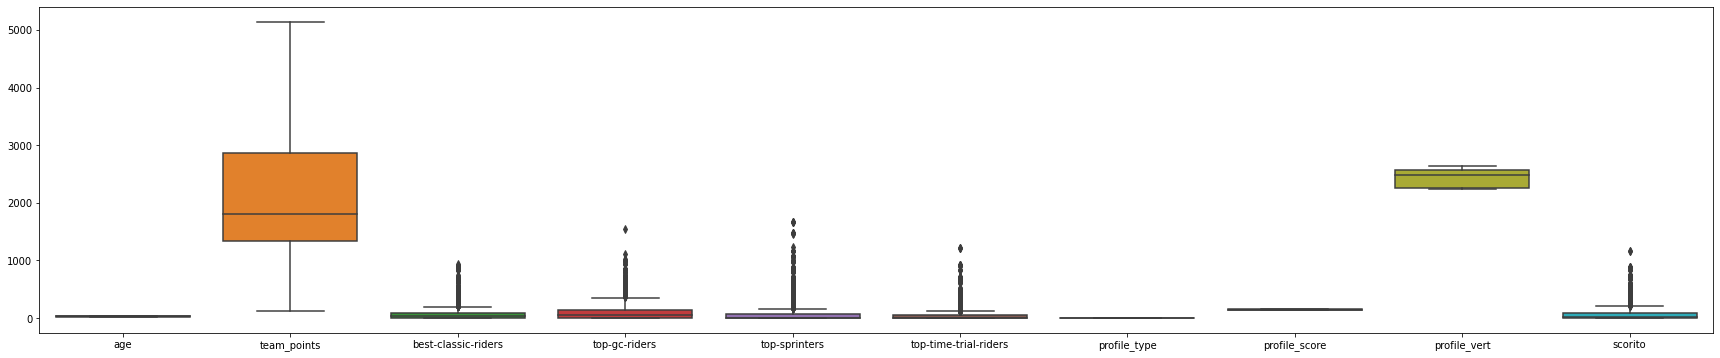

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30,6))
sns.boxplot(data=X)

In [92]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train_scaled = scaler.fit_transform(X_train)

In [93]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor

model = Lasso()

cv_results = cross_validate(model, X_scaled, y, cv=5, scoring='r2')

In [94]:
cv_results['test_score'].mean()

0.20030104856429745

In [95]:
model.fit(X_train_scaled, y_train)

Lasso()

In [96]:
X_test_scaled = scaler.fit_transform(X_test)
model.score(X_test_scaled, y_test)

0.17283640235543796

In [99]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning(X,y):

    train_sizes = [25,50,75,100,250,500,750,1000,1150, 1500]

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=3)

    plt.figure(figsize=(20,6))
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='test scores')
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='train scores')
    plt.legend()
    plt.title('Learning Curves')
    plt.show()

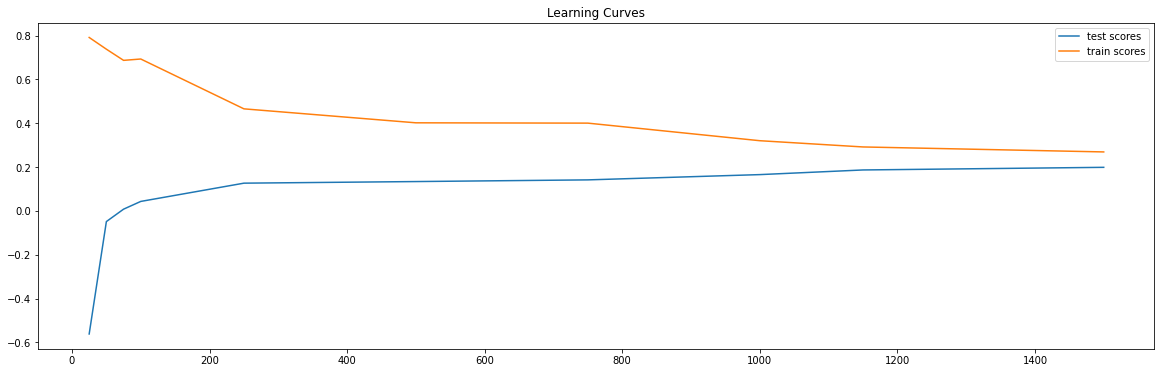

In [100]:
plot_learning(X_scaled,y)